# Linear Regression and Machine Learning Project
## Author: Jeremy Rummel
### GitHub: <a>https://github.com/jfrummel/datafun-07-ml<a>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

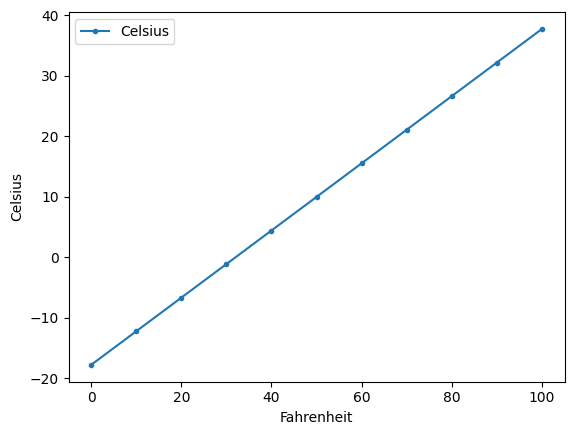

In [2]:
import pandas as pd
import matplotlib

c = lambda f: 5 / 9 * ( f- 32)
temps = [(f ,c(f)) for f in range (0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=["Fahrenheit", "Celsius"])
axes = temps_df.plot(x="Fahrenheit", y="Celsius", style=".-")
y_label = axes.set_ylabel("Celsius")

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [3]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 -Data Inspection

In [4]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [6]:
nyc_df.columns = ["Date", "Temperature", "Anomaly"]
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [7]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [8]:
linear_regression = stats.linregress(x= nyc_df.Date, y= nyc_df.Temperature)
print(linear_regression.slope)
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


### Section 6 - Predict

In [9]:
avg_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(avg_2024)

38.5922281667978


### Section 7 - Visualizations

(10.0, 70.0)

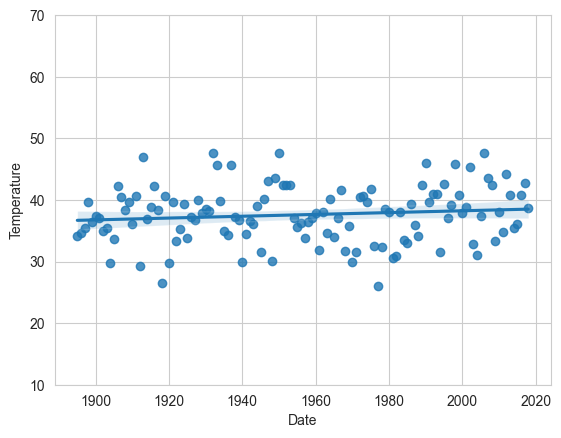

In [10]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)


## Part 3 - Prediction 

### Section 1 - Build the Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)
print(X_train.shape)
print(X_test.shape)
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)
print(linear_regression.coef_)
print(linear_regression.intercept_)

(93, 1)
(31, 1)
[0.01939167]
-0.30779820252656975


### Section 2 - Test the Model

In [12]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [13]:
predict = (lambda x : linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

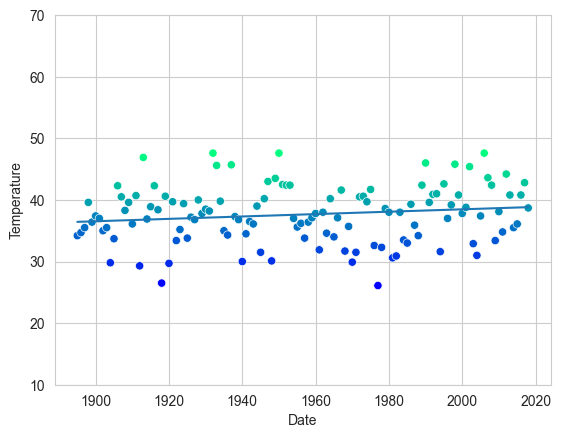

In [14]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Comparison